## Universidad Autonoma de Aguascalientes
## Departamento: Ciencias de la computacion
## Carrera: Ingenieria en Computacion Inteligente
## Curso: Machine  y Deep Learning
## Maestro: Dr. Francisco Javier Luna Rosas
## Alumno: Guillermo González Lara (237864)
 Semestre: Enero_Junio del 2026

## Practica 11: Curva ROC


La Curva ROC (Receiver Operating Characteristic o Característica Operativa del Receptor) es una herramienta gráfica fundamental para evaluar el rendimiento de modelos de clasificación binaria.

En términos simples, te ayuda a visualizar qué tan bueno es tu modelo para distinguir entre dos clases (por ejemplo: "crítica positiva" vs. "crítica negativa" en tu proyecto de reseñas de películas).

La curva ROC tiene tres utilidades principales en tus proyectos de Machine Learning:
-  Encontrar el equilibrio (Trade-off)

Los modelos no solo dicen "Clase A" o "Clase B", sino que dan una probabilidad (ej. 0.85). Tú decides el umbral de corte (normalmente 0.5).

La curva te permite ver cómo cambia el rendimiento si mueves ese umbral.

Ejemplo: Si estás detectando fraude bancario, tal vez prefieras aceptar más "Falsos Positivos" (bloquear tarjetas por error a veces) con tal de no dejar pasar ningún fraude (alta Sensibilidad). La curva te dice exactamente dónde poner ese corte.

- Evaluar el modelo con una sola métrica (AUC)

El AUC (Area Under the Curve) es el área bajo la línea azul de la curva. Es el número estándar para comparar modelos:

    AUC = 0.5: El modelo no sirve (es igual a lanzar una moneda, representado por la línea diagonal punteada).

    AUC = 1.0: El modelo es perfecto (separa las clases sin ningún error).

    AUC > 0.7: Generalmente se considera aceptable.

- Comparar Modelos

Si tienes dos modelos (por ejemplo, una Regresión Logística y un Random Forest) para tu proyecto de clasificación de películas, puedes graficar ambas curvas ROC. La curva que esté más "arriba" y a la "izquierda" (más cerca de la esquina superior izquierda) pertenece al mejor modelo.

Paso 1: Importar las librerías

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, auc



### Paso 2: Obtener las probabilidades
Entrenamos una Red Neuronal (MLP) rápida y obtenemos las probabilidades de la clase positiva.

In [2]:
X, y = make_classification(n_samples=1000, n_classes=2, random_state=42)

# Dividimos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

print("Datos generados exitosamente.")
print(f"Muestras de entrenamiento: {X_train.shape[0]}")
print(f"Muestras de prueba: {X_test.shape[0]}")

# Entrenamos el modelo
clf = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=42)
clf.fit(X_train, y_train)

# Obtenemos las probabilidades (Score)
# La columna [:, 1] es la probabilidad de que sea la clase 1 (Positiva)
y_score = clf.predict_proba(X_test)[:, 1]

# Mostramos algunos valores para entender qué está pasando
print("Ejemplo de etiquetas reales (y_test):", y_test[:5])
print("Ejemplo de probabilidades (y_score):", y_score[:5])

Datos generados exitosamente.
Muestras de entrenamiento: 500
Muestras de prueba: 500
Ejemplo de etiquetas reales (y_test): [1 1 1 1 1]
Ejemplo de probabilidades (y_score): [0.4849537  0.97909641 0.10542595 0.99787923 0.93681998]


c:\Users\Laremo\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


### Paso 3: Calcular y Graficar la Curva ROC
Usamos los datos reales (`y_test`) comparados contra las probabilidades (`y_score`) para trazar la curva.

In [3]:
# Calculamos FPR y TPR para todos los umbrales posibles
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)


### Paso 4: Visualización de la Curva ROC

Se genera el gráfico de la curva ROC. La línea diagonal punteada representa el rendimiento de un clasificador aleatorio (AUC = 0.5). Cuanto más se acerque la curva naranja a la esquina superior izquierda, mejor es el rendimiento del modelo (AUC cercano a 1.0).

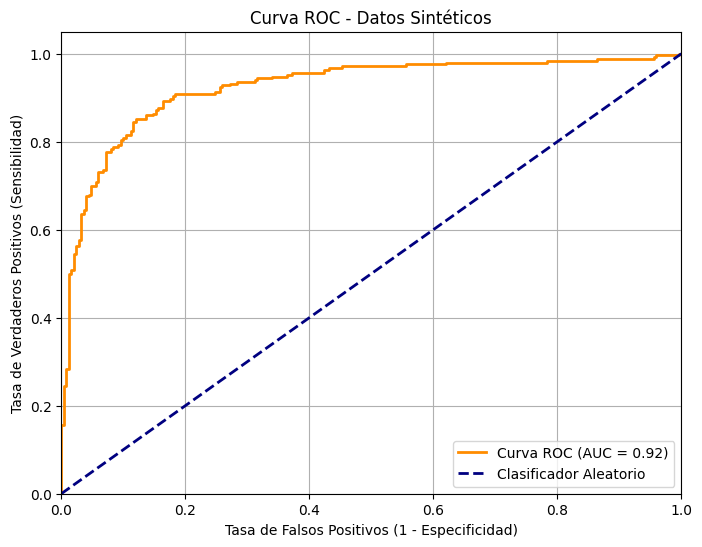

In [4]:
# Graficamos
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Clasificador Aleatorio')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (1 - Especificidad)')
plt.ylabel('Tasa de Verdaderos Positivos (Sensibilidad)')
plt.title('Curva ROC - Datos Sintéticos')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

## Conclusiones

En esta práctica se implementó un modelo de clasificación binaria utilizando una red neuronal artificial (MLPClassifier) sobre datos sintéticos generados mediante `make_classification`. 

El análisis mediante la curva ROC permitió visualizar la capacidad discriminativa del modelo independientemente del umbral de decisión. Se obtuvo un valor de AUC superior a 0.5, lo que indica que el modelo posee capacidad predictiva y supera el rendimiento de una clasificación aleatoria. Esta métrica resulta fundamental para comparar modelos y seleccionar el umbral operativo óptimo según los costos asociados a los falsos positivos y falsos negativos.

## Referencias

* Machine Learning in Python, (2026). Receiver Operating Characteristic (ROC). URL: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
* Machine Learning in Python, (2026). MLPClassifier. URL: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
* Oldemar Rodriguez (2025). Reporte Técnico de PROMIDAT: http://promidat.com/